## Project Overview
This project belongs to Azizha Zeinita.

**1. Analyze Cryptocurrency Market Data:**
* Gather market data from alternative APIs since Binance is blocked.
* Perform analysis on price trends, volume, and volatility using Python libraries.

**2. Develop a Blockchain Application:**
* Build a basic Ethereum smart contract for storing and querying cryptocurrency data.
* Interact with the Ethereum blockchain using Python.

### Tools and Platforms Summary
* Data Source: CoinGecko API.
* Libraries: pandas, matplotlib, requests, web3.
* Blockchain Development:
* Ganache: Local Ethereum blockchain.
* Solidity: Writing smart contracts (https://remix.ethereum.org/).
* web3.py: Interacting with the Ethereum blockchain.

### 1. Fetch Cryptocurrency Market Data
We'll use the CoinGecko API (free and not blocked) for fetching cryptocurrency data.

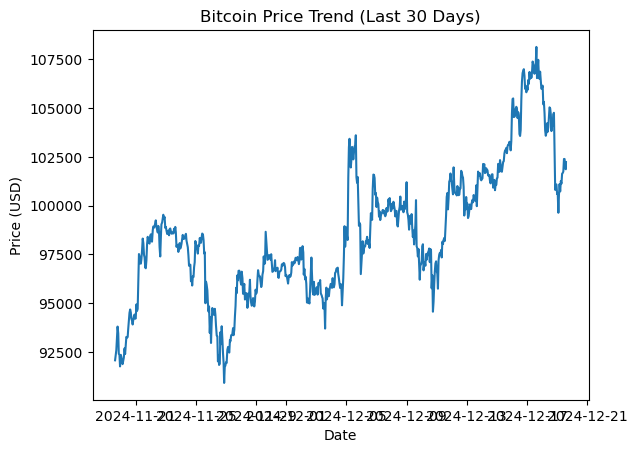

In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch cryptocurrency data from CoinGecko
def fetch_crypto_data(coin_id, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)
    data = response.json()
    
    # Process the data into a DataFrame
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    return prices

# Fetch Bitcoin data for the past 30 days
crypto_data = fetch_crypto_data("bitcoin", 30)

# Plot the data
plt.plot(crypto_data['timestamp'], crypto_data['price'])
plt.title("Bitcoin Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


### 2. Analyze Data
Perform basic analysis like calculating moving averages or price volatility.

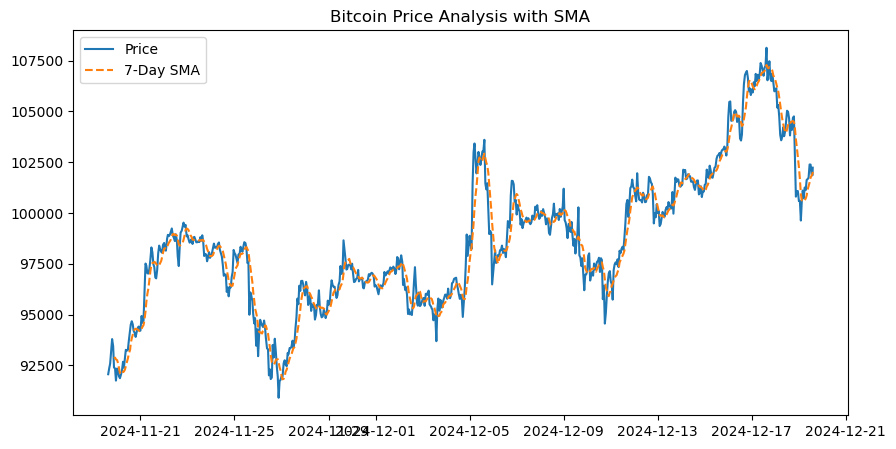

In [33]:
def analyze_data(data):
    data['SMA_7'] = data['price'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['Volatility'] = data['price'].pct_change().rolling(window=7).std()  # 7-day Volatility
    return data

# Analyze the data
analyzed_data = analyze_data(crypto_data)

# Plot with moving average
plt.figure(figsize=(10, 5))
plt.plot(analyzed_data['timestamp'], analyzed_data['price'], label="Price")
plt.plot(analyzed_data['timestamp'], analyzed_data['SMA_7'], label="7-Day SMA", linestyle="--")
plt.title("Bitcoin Price Analysis with SMA")
plt.legend()
plt.show()


### 3. Develop a Blockchain Application

1. Write a Smart Contract

* Create a simple smart contract in Solidity to store and retrieve cryptocurrency prices.
* File: CryptoData.sol
* Tool: https://remix.ethereum.org/ (Solidity)

#### A. First Version
``` solidity
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

contract CryptoData {
    mapping(string => uint256) private prices;

    // Store a price for a given cryptocurrency
    function storePrice(string memory coin, uint256 price) public {
        prices[coin] = price;
    }

    // Retrieve the price for a given cryptocurrency
    function getPrice(string memory coin) public view returns (uint256) {
        return prices[coin];
    }
}

```

#### B. Second Version
```solidity
// SPDX-License-Identifier: UNLICENSED
pragma solidity ^0.8.0;

contract CryptoData {
    // Define the structure to hold the data
    struct Data {
        uint256 price;
        uint256 movingAvg;
        uint256 volatility;
        uint256 ema7;
        uint256 rsi;
        uint256 timestamp;
    }

    // Mapping to store data for each coin by name
    mapping(string => Data) public priceData;

    // Store data for a given coin
    function storeData(
        string memory coin,
        uint256 price,
        uint256 movingAvg,
        uint256 volatility,
        uint256 ema7,
        uint256 rsi
    ) public {
        priceData[coin] = Data(price, movingAvg, volatility, ema7, rsi, block.timestamp);
        // Add an event for easier debugging
        emit DataStored(coin, price, movingAvg, volatility, ema7, rsi, block.timestamp);
    }

    // Add event definition
    event DataStored(
        string coin,
        uint256 price,
        uint256 movingAvg,
        uint256 volatility,
        uint256 ema7,
        uint256 rsi,
        uint256 timestamp
    );

    // Retrieve data for a given coin
    function getData(string memory coin) public view returns (
        uint256 price,
        uint256 movingAvg,
        uint256 volatility,
        uint256 ema7,
        uint256 rsi,
        uint256 timestamp
    ) {
        Data memory data = priceData[coin];
        return (
            data.price,
            data.movingAvg,
            data.volatility,
            data.ema7,
            data.rsi,
            data.timestamp
        );
    }
}

```

### 2. Compile and Deploy the Smart Contract

* Use Ganache for local blockchain deployment and Python's web3 library to interact with it.
* Code: Deploy and Interact with Smart Contract

In [86]:
from web3 import Web3
import json

# Connect to Ganache (local Ethereum node)
ganache_url = "http://127.0.0.1:7545"  # Replace with your Ganache local URL
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Check connection using web3.eth.blockNumber
try:
    block_number = web3.eth.block_number  # Get the current block number to check if connected
    print(f"Successfully connected to Ganache! Current block number: {block_number}")
except Exception as e:
    print(f"Failed to connect to Ganache: {e}")

# Set the default account (from Ganache)
web3.eth.default_account = web3.eth.accounts[0]  # Use the first account in Ganache

# ABI of the smart contract (copy this from Remix)
contract_abi = [
    {
        "inputs": [
            {
                "internalType": "string",
                "name": "coin",
                "type": "string"
            },
            {
                "internalType": "uint256",
                "name": "price",
                "type": "uint256"
            }
        ],
        "name": "storePrice",
        "outputs": [],
        "stateMutability": "nonpayable",
        "type": "function"
    },
    {
        "inputs": [
            {
                "internalType": "string",
                "name": "coin",
                "type": "string"
            }
        ],
        "name": "getPrice",
        "outputs": [
            {
                "internalType": "uint256",
                "name": "",
                "type": "uint256"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    }
]

# Your provided bytecode
# It's in https://remix.ethereum.org/ -> solidity compiler -> Bytecode
contract_bytecode = "608060405234801561001057600080fd5b50610398806100206000396000f3fe608060405234801561001057600080fd5b50600436106100365760003560e01c8063524f38891461003b578063d4d2f8f61461006b575b600080fd5b61005560048036038101906100509190610152565b610087565b604051610062919061023e565b60405180910390f35b61008560048036038101906100809190610193565b6100ae565b005b600080826040516100989190610227565b9081526020016040518091039020549050919050565b806000836040516100bf9190610227565b9081526020016040518091039020819055505050565b60006100e86100e38461028a565b610259565b90508281526020810184848401111561010057600080fd5b61010b8482856102da565b509392505050565b600082601f83011261012457600080fd5b81356101348482602086016100d5565b91505092915050565b60008135905061014c8161034b565b92915050565b60006020828403121561016457600080fd5b600082013567ffffffffffffffff81111561017e57600080fd5b61018a84828501610113565b91505092915050565b600080604083850312156101a657600080fd5b600083013567ffffffffffffffff8111156101c057600080fd5b6101cc85828601610113565b92505060206101dd8582860161013d565b9150509250929050565b60006101f2826102ba565b6101fc81856102c5565b935061020c8185602086016102e9565b80840191505092915050565b610221816102d0565b82525050565b600061023382846101e7565b915081905092915050565b60006020820190506102536000830184610218565b92915050565b6000604051905081810181811067ffffffffffffffff821117156102805761027f61031c565b5b8060405250919050565b600067ffffffffffffffff8211156102a5576102a461031c565b5b601f19601f8301169050602081019050919050565b600081519050919050565b600081905092915050565b6000819050919050565b82818337600083830152505050565b60005b838110156103075780820151818401526020810190506102ec565b83811115610316576000848401525b50505050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052604160045260246000fd5b610354816102d0565b811461035f57600080fd5b5056fea264697066735822122010d90bd037bcb5f822b42c27d74dea3202d5e8155089a6d173181a280f89d91c64736f6c63430008000033"

# Deploy the contract
CryptoData = web3.eth.contract(abi=contract_abi, bytecode=contract_bytecode)

# Prepare the transaction to deploy the contract
tx_hash = CryptoData.constructor().transact()

# Wait for the transaction receipt
tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

# Get the contract address from the receipt
contract_address = tx_receipt.contractAddress

# Interact with the contract after deployment
crypto_data_contract = web3.eth.contract(address=contract_address, abi=contract_abi)

# Store a price for Bitcoin
crypto_data_contract.functions.storePrice("Bitcoin", 50000).transact()

# Retrieve the price for Bitcoin
price = crypto_data_contract.functions.getPrice("Bitcoin").call()
print(f"The stored price for Bitcoin is: {price}")


Successfully connected to Ganache! Current block number: 4
The stored price for Bitcoin is: 50000


### 3. Add Moving Average, Volatlity, and TImestamp

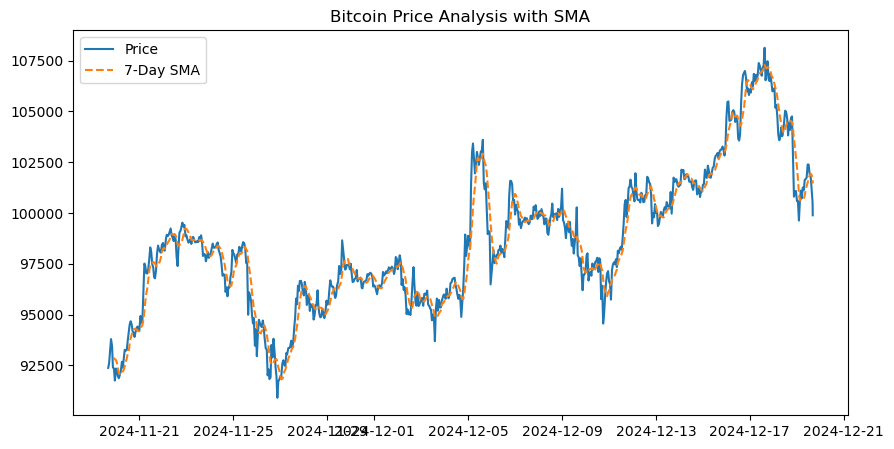

Stored data for Bitcoin on the blockchain:
Price: 99891.793407 USD
Moving Average (7-day): 101456.222102 USD
Volatility: 0.004853
Timestamp: 2024-12-19 16:15:47


C:\Users\THINKPAD X1 CARBON\AppData\Local\Temp\ipykernel_17448\730456525.py:153: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  stored_timestamp_readable = datetime.utcfromtimestamp(stored_timestamp)


In [150]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from web3 import Web3
from datetime import datetime

# Fetch cryptocurrency data from CoinGecko
def fetch_crypto_data(coin_id, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)
    data = response.json()
    
    # Process the data into a DataFrame
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    return prices

# Analyze data (Moving Averages, Volatility, etc.)
def analyze_data(data):
    data['SMA_7'] = data['price'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['Volatility'] = data['price'].pct_change().rolling(window=7).std()  # 7-day Volatility
    return data

# Connect to Ganache and deploy/load contract
def connect_to_ethereum():
    ganache_url = "http://127.0.0.1:7545"  # Ganache running locally
    web3 = Web3(Web3.HTTPProvider(ganache_url))
    web3.eth.default_account = web3.eth.accounts[0]  # Use the first account from Ganache

    # The updated ABI for the contract
    contract_abi = [
        {
            "inputs": [
                {
                    "internalType": "string",
                    "name": "coin",
                    "type": "string"
                },
                {
                    "internalType": "uint256",
                    "name": "price",
                    "type": "uint256"
                },
                {
                    "internalType": "uint256",
                    "name": "movingAvg",
                    "type": "uint256"
                },
                {
                    "internalType": "uint256",
                    "name": "volatility",
                    "type": "uint256"
                }
            ],
            "name": "storeData",
            "outputs": [],
            "stateMutability": "nonpayable",
            "type": "function"
        },
        {
            "inputs": [
                {
                    "internalType": "string",
                    "name": "coin",
                    "type": "string"
                }
            ],
            "name": "getData",
            "outputs": [
                {
                    "internalType": "uint256",
                    "name": "",
                    "type": "uint256"
                },
                {
                    "internalType": "uint256",
                    "name": "",
                    "type": "uint256"
                },
                {
                    "internalType": "uint256",
                    "name": "",
                    "type": "uint256"
                },
                {
                    "internalType": "uint256",
                    "name": "",
                    "type": "uint256"
                }
            ],
            "stateMutability": "view",
            "type": "function"
        }
    ]
    
    contract_bytecode = "608060405234801561001057600080fd5b5061048c806100206000396000f3fe608060405234801561001057600080fd5b50600436106100365760003560e01c8063ae55c8881461003b578063f6041a791461006e575b600080fd5b610055600480360381019061005091906101f5565b61008a565b6040516100659493929190610308565b60405180910390f35b61008860048036038101906100839190610236565b610108565b005b600080600080600080866040516100a191906102f1565b9081526020016040518091039020604051806080016040529081600082015481526020016001820154815260200160028201548152602001600382015481525050905080600001518160200151826040015183606001519450945094509450509193509193565b60405180608001604052808481526020018381526020018281526020014281525060008560405161013991906102f1565b90815260200160405180910390206000820151816000015560208201518160010155604082015181600201556060820151816003015590505050505050565b600061018b6101868461037e565b61034d565b9050828152602081018484840111156101a357600080fd5b6101ae8482856103ce565b509392505050565b600082601f8301126101c757600080fd5b81356101d7848260208601610178565b91505092915050565b6000813590506101ef8161043f565b92915050565b60006020828403121561020757600080fd5b600082013567ffffffffffffffff81111561022157600080fd5b61022d848285016101b6565b91505092915050565b6000806000806080858703121561024c57600080fd5b600085013567ffffffffffffffff81111561026657600080fd5b610272878288016101b6565b9450506020610283878288016101e0565b9350506040610294878288016101e0565b92505060606102a5878288016101e0565b91505092959194509250565b60006102bc826103ae565b6102c681856103b9565b93506102d68185602086016103dd565b80840191505092915050565b6102eb816103c4565b82525050565b60006102fd82846102b1565b915081905092915050565b600060808201905061031d60008301876102e2565b61032a60208301866102e2565b61033760408301856102e2565b61034460608301846102e2565b95945050505050565b6000604051905081810181811067ffffffffffffffff8211171561037457610373610410565b5b8060405250919050565b600067ffffffffffffffff82111561039957610398610410565b5b601f19601f8301169050602081019050919050565b600081519050919050565b600081905092915050565b6000819050919050565b82818337600083830152505050565b60005b838110156103fb5780820151818401526020810190506103e0565b8381111561040a576000848401525b50505050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052604160045260246000fd5b610448816103c4565b811461045357600080fd5b5056fea2646970667358221220348a5dc0a5aea7e0423401a2d817a650a4a19dc812e404d7fac4313a84d5723464736f6c63430008000033"
    
    # Create the contract object
    CryptoData2 = web3.eth.contract(abi=contract_abi, bytecode=contract_bytecode)

    # Deploy the contract
    tx_hash = CryptoData2.constructor().transact()
    tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    contract_address = tx_receipt.contractAddress

    # Create a contract object using the deployed address
    crypto_data_contract = web3.eth.contract(address=contract_address, abi=contract_abi)
    
    return web3, crypto_data_contract

# Store data on the blockchain
def store_data_on_blockchain(contract, coin, price, moving_avg, volatility):
    # Convert price, moving average, and volatility to uint256 by scaling (e.g., multiply by 10^6)
    scale_factor = 10**6
    scaled_price = int(price * scale_factor)
    scaled_moving_avg = int(moving_avg * scale_factor)
    scaled_volatility = int(volatility * scale_factor)

    tx_hash = contract.functions.storeData(coin, scaled_price, scaled_moving_avg, scaled_volatility).transact()
    web3.eth.wait_for_transaction_receipt(tx_hash)

# Fetch and analyze data, then store it on the blockchain
def main():
    # Step 1: Fetch cryptocurrency data
    crypto_data = fetch_crypto_data("bitcoin", 30)
    
    # Step 2: Analyze the data (calculate moving averages, volatility, etc.)
    analyzed_data = analyze_data(crypto_data)
    
    # Step 3: Visualize the data
    plt.figure(figsize=(10, 5))
    plt.plot(analyzed_data['timestamp'], analyzed_data['price'], label="Price")
    plt.plot(analyzed_data['timestamp'], analyzed_data['SMA_7'], label="7-Day SMA", linestyle="--")
    plt.title("Bitcoin Price Analysis with SMA")
    plt.legend()
    plt.show()
    
    # Step 4: Connect to Ethereum (Ganache or any testnet)
    web3, crypto_data_contract = connect_to_ethereum()
    
    # Step 5: Store the latest price, moving average, and volatility
    latest_price = analyzed_data['price'].iloc[-1]
    moving_avg = analyzed_data['SMA_7'].iloc[-1]
    volatility = analyzed_data['Volatility'].iloc[-1]
    
    store_data_on_blockchain(crypto_data_contract, "Bitcoin", latest_price, moving_avg, volatility)
    
    # Retrieve and print stored data from blockchain
    stored_price, stored_moving_avg, stored_volatility, stored_timestamp = crypto_data_contract.functions.getData("Bitcoin").call()

    # Convert to datetime
    stored_timestamp_readable = datetime.utcfromtimestamp(stored_timestamp)
    
    # Convert the retrieved data back by dividing by 10^6 to get the original value
    original_price = stored_price / 10**6
    original_moving_avg = stored_moving_avg / 10**6
    original_volatility = stored_volatility / 10**6
    
    print(f"Stored data for Bitcoin on the blockchain:")
    print(f"Price: {original_price} USD")
    print(f"Moving Average (7-day): {original_moving_avg} USD")
    print(f"Volatility: {original_volatility}")
    print(f"Timestamp: {stored_timestamp_readable}")

if __name__ == "__main__":
    main()


### 4. Add Relative Strength Index (RSI)

In [178]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from web3 import Web3
from datetime import datetime
import time

# Fetch cryptocurrency data from CoinGecko
def fetch_crypto_data(coin_id, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)
    data = response.json()
    
    # Process the data into a DataFrame
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    return prices

# Analyze data (Moving Averages, Volatility, etc.)
def analyze_data(data):
    data['SMA_7'] = data['price'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['EMA_7'] = data['price'].ewm(span=7, adjust=False).mean()  # 7-day Exponential Moving Average
    data['RSI'] = calculate_rsi(data['price'], window=14)  # 14-day Relative Strength Index
    data['Volatility'] = data['price'].pct_change().rolling(window=7).std()  # 7-day Volatility
    data['Upper_Band'], data['Lower_Band'] = calculate_bollinger_bands(data['price'], window=20)  # Bollinger Bands
    return data

# Calculate RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Bollinger Bands
def calculate_bollinger_bands(prices, window=20):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

# Connect to Ganache and deploy/load contract
def connect_to_ethereum():
    ganache_url = "http://127.0.0.1:7545"  # Ganache running locally
    web3 = Web3(Web3.HTTPProvider(ganache_url))
    web3.eth.default_account = web3.eth.accounts[0]  # Use the first account from Ganache

    contract_abi = [
        {
            "inputs": [
                {"internalType": "string", "name": "coin", "type": "string"},
                {"internalType": "uint256", "name": "price", "type": "uint256"},
                {"internalType": "uint256", "name": "movingAvg", "type": "uint256"},
                {"internalType": "uint256", "name": "volatility", "type": "uint256"},
                {"internalType": "uint256", "name": "ema7", "type": "uint256"},
                {"internalType": "uint256", "name": "rsi", "type": "uint256"}
            ],
            "name": "storeData",
            "outputs": [],
            "stateMutability": "nonpayable",
            "type": "function"
        },
        {
            "inputs": [{"internalType": "string", "name": "coin", "type": "string"}],
            "name": "getData",
            "outputs": [
                {"internalType": "uint256", "name": "price", "type": "uint256"},
                {"internalType": "uint256", "name": "movingAvg", "type": "uint256"},
                {"internalType": "uint256", "name": "volatility", "type": "uint256"},
                {"internalType": "uint256", "name": "ema7", "type": "uint256"},
                {"internalType": "uint256", "name": "rsi", "type": "uint256"},
                {"internalType": "uint256", "name": "timestamp", "type": "uint256"}
            ],
            "name": "getData",
            "stateMutability": "view",
            "type": "function"
        }
    ]
    
    contract_bytecode = "608060405234801561001057600080fd5b506105ab806100206000396000f3fe608060405234801561001057600080fd5b50600436106100415760003560e01c806314de7a2414610046578063ae55c8881461007b578063c2a9d2d3146100b0575b600080fd5b610060600480360381019061005b91906102d2565b6100cc565b6040516100729695949392919061040b565b60405180910390f35b610095600480360381019061009091906102d2565b61011e565b6040516100a79695949392919061040b565b60405180910390f35b6100ca60048036038101906100c59190610313565b6101c3565b005b6000818051602081018201805184825260208301602085012081835280955050505050506000915090508060000154908060010154908060020154908060030154908060040154908060050154905086565b6000806000806000806000808860405161013891906103f4565b90815260200160405180910390206040518060c001604052908160008201548152602001600182015481526020016002820154815260200160038201548152602001600482015481526020016005820154815250509050806000015181602001518260400151836060015184608001518560a001519650965096509650965096505091939550919395565b6040518060c001604052808681526020018581526020018481526020018381526020018281526020014281525060008760405161020091906103f4565b9081526020016040518091039020600082015181600001556020820151816001015560408201518160020155606082015181600301556080820151816004015560a08201518160050155905050505050505050565b60006102686102638461049d565b61046c565b90508281526020810184848401111561028057600080fd5b61028b8482856104ed565b509392505050565b600082601f8301126102a457600080fd5b81356102b4848260208601610255565b91505092915050565b6000813590506102cc8161055e565b92915050565b6000602082840312156102e457600080fd5b600082013567ffffffffffffffff8111156102fe57600080fd5b61030a84828501610293565b91505092915050565b60008060008060008060c0878903121561032c57600080fd5b600087013567ffffffffffffffff81111561034657600080fd5b61035289828a01610293565b965050602061036389828a016102bd565b955050604061037489828a016102bd565b945050606061038589828a016102bd565b935050608061039689828a016102bd565b92505060a06103a789828a016102bd565b9150509295509295509295565b60006103bf826104cd565b6103c981856104d8565b93506103d98185602086016104fc565b80840191505092915050565b6103ee816104e3565b82525050565b600061040082846103b4565b915081905092915050565b600060c08201905061042060008301896103e5565b61042d60208301886103e5565b61043a60408301876103e5565b61044760608301866103e5565b61045460808301856103e5565b61046160a08301846103e5565b979650505050505050565b6000604051905081810181811067ffffffffffffffff821117156104935761049261052f565b5b8060405250919050565b600067ffffffffffffffff8211156104b8576104b761052f565b5b601f19601f8301169050602081019050919050565b600081519050919050565b600081905092915050565b6000819050919050565b82818337600083830152505050565b60005b8381101561051a5780820151818401526020810190506104ff565b83811115610529576000848401525b50505050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052604160045260246000fd5b610567816104e3565b811461057257600080fd5b5056fea264697066735822122046ed739d310b99a0fe78236661eb8ef5ee3daa29a3c9b1fe891ef509ab7e7b3564736f6c63430008000033"
    
    # Create the contract object
    CryptoData = web3.eth.contract(abi=contract_abi, bytecode=contract_bytecode)

    # Deploy the contract
    tx_hash = CryptoData.constructor().transact()
    tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    contract_address = tx_receipt.contractAddress

    # Create a contract object using the deployed address
    crypto_data_contract = web3.eth.contract(address=contract_address, abi=contract_abi)
    
    return web3, crypto_data_contract

# Fetch and store data on blockchain
def store_data_on_blockchain(contract, coin, price, moving_avg, volatility, ema7, rsi):
    # Convert all data to uint256 by scaling (e.g., multiply by 10^6)
    scale_factor = 10**6
    scaled_price = int(price * scale_factor)
    scaled_moving_avg = int(moving_avg * scale_factor)
    scaled_volatility = int(volatility * scale_factor)
    scaled_ema7 = int(ema7 * scale_factor)
    scaled_rsi = int(rsi * scale_factor)

    # Print the coin name to ensure consistency
    print(f"Storing data for coin: {coin}")

    # Call the storeData function with all required parameters
    tx_hash = contract.functions.storeData(
        coin, scaled_price, scaled_moving_avg, scaled_volatility, scaled_ema7, scaled_rsi
    ).transact()

    # Wait for the transaction to be mined
    tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    print(f"Transaction mined. Block: {tx_receipt['blockNumber']}")

    # Add a delay before retrieving the data
    time.sleep(5)  # Wait a few seconds to ensure the data is available

    print(f"Data for {coin} has been stored on the blockchain.")


# Retrieve data from blockchain
def retrieve_data_from_blockchain(contract, coin):
    try:
        # Call the getData function and unpack the returned values
        stored_price, stored_moving_avg, stored_volatility, stored_ema7, stored_rsi, stored_timestamp = contract.functions.getData(coin).call()

        # Convert timestamp to a readable format
        stored_timestamp_readable = datetime.utcfromtimestamp(stored_timestamp)

        # Convert the retrieved data back by dividing by 10^6 to get the original value
        original_price = stored_price / 10**6
        original_moving_avg = stored_moving_avg / 10**6
        original_volatility = stored_volatility / 10**6
        original_ema7 = stored_ema7 / 10**6
        original_rsi = stored_rsi / 10**6

        print(f"Stored data for {coin} on the blockchain:")
        print(f"Price: {original_price} USD")
        print(f"Moving Average (7-day): {original_moving_avg} USD")
        print(f"Volatility: {original_volatility}")
        print(f"EMA-7: {original_ema7}")
        print(f"RSI: {original_rsi}")
        print(f"Timestamp: {stored_timestamp_readable}")

    except Exception as e:
        print(f"Error retrieving data: {e}")
        print("No data found or transaction not yet confirmed.")

def main():
    # Define the cryptocurrency coin and the number of days of data to fetch
    coin_id = 'bitcoin'
    days = 30  #last 30 days of data

    # Fetch cryptocurrency data
    print(f"Fetching data for {coin_id}...")
    crypto_data = fetch_crypto_data(coin_id, days)
    print(f"Fetched {len(crypto_data)} data points for {coin_id}.")

    # Analyze data
    print("Analyzing data...")
    analyzed_data = analyze_data(crypto_data)

    # Connect to Ethereum blockchain and deploy contract
    print("Connecting to Ethereum blockchain...")
    web3, crypto_data_contract = connect_to_ethereum()
    print(f"Connected to Ethereum. Contract address: {crypto_data_contract.address}")

    # Store the last data point on the blockchain
    last_data = analyzed_data.iloc[-1]  # Use the most recent data
    coin = coin_id
    price = last_data['price']
    moving_avg = last_data['SMA_7']
    volatility = last_data['Volatility']
    ema7 = last_data['EMA_7']
    rsi = last_data['RSI']

    print("Storing data on the blockchain...")
    store_data_on_blockchain(crypto_data_contract, coin, price, moving_avg, volatility, ema7, rsi)

    # Retrieve the stored data from the blockchain
    print("Retrieving data from the blockchain...")
    retrieve_data_from_blockchain(crypto_data_contract, coin)

if __name__ == "__main__":
    main()


Fetching data for bitcoin...
Fetched 720 data points for bitcoin.
Analyzing data...
Connecting to Ethereum blockchain...
Connected to Ethereum. Contract address: 0xC8D01BCc40e12fdB91c2c7b5f9ADC1aE6006806A
Storing data on the blockchain...
Storing data for coin: bitcoin
Transaction mined. Block: 34
Data for bitcoin has been stored on the blockchain.
Retrieving data from the blockchain...
Stored data for bitcoin on the blockchain:
Price: 101088.851871 USD
Moving Average (7-day): 101627.230454 USD
Volatility: 0.005302
EMA-7: 101328.833151
RSI: 55.123908
Timestamp: 2024-12-19 16:42:02


C:\Users\THINKPAD X1 CARBON\AppData\Local\Temp\ipykernel_17448\2332530773.py:134: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  stored_timestamp_readable = datetime.utcfromtimestamp(stored_timestamp)


### 5. Add Visualization

Fetching data for bitcoin...
Fetched 720 data points for bitcoin.
Analyzing data...
Connecting to Ethereum blockchain...
Connected to Ethereum. Contract address: 0x5479cf4565a463bDE281f7D1e913688C23a0F3F8
Storing data on the blockchain...
Storing data for coin: bitcoin
Transaction mined. Block: 37
Data for bitcoin has been stored on the blockchain.
Retrieving data from the blockchain...
Stored data for bitcoin on the blockchain:
Price: 100928.37928 USD
Moving Average (7-day): 101604.305798 USD
Volatility: 0.005015
EMA-7: 101288.715003
RSI: 53.707274
Timestamp: 2024-12-19 16:50:29
Plotting the data...


C:\Users\THINKPAD X1 CARBON\AppData\Local\Temp\ipykernel_17448\2482389315.py:134: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  stored_timestamp_readable = datetime.utcfromtimestamp(stored_timestamp)


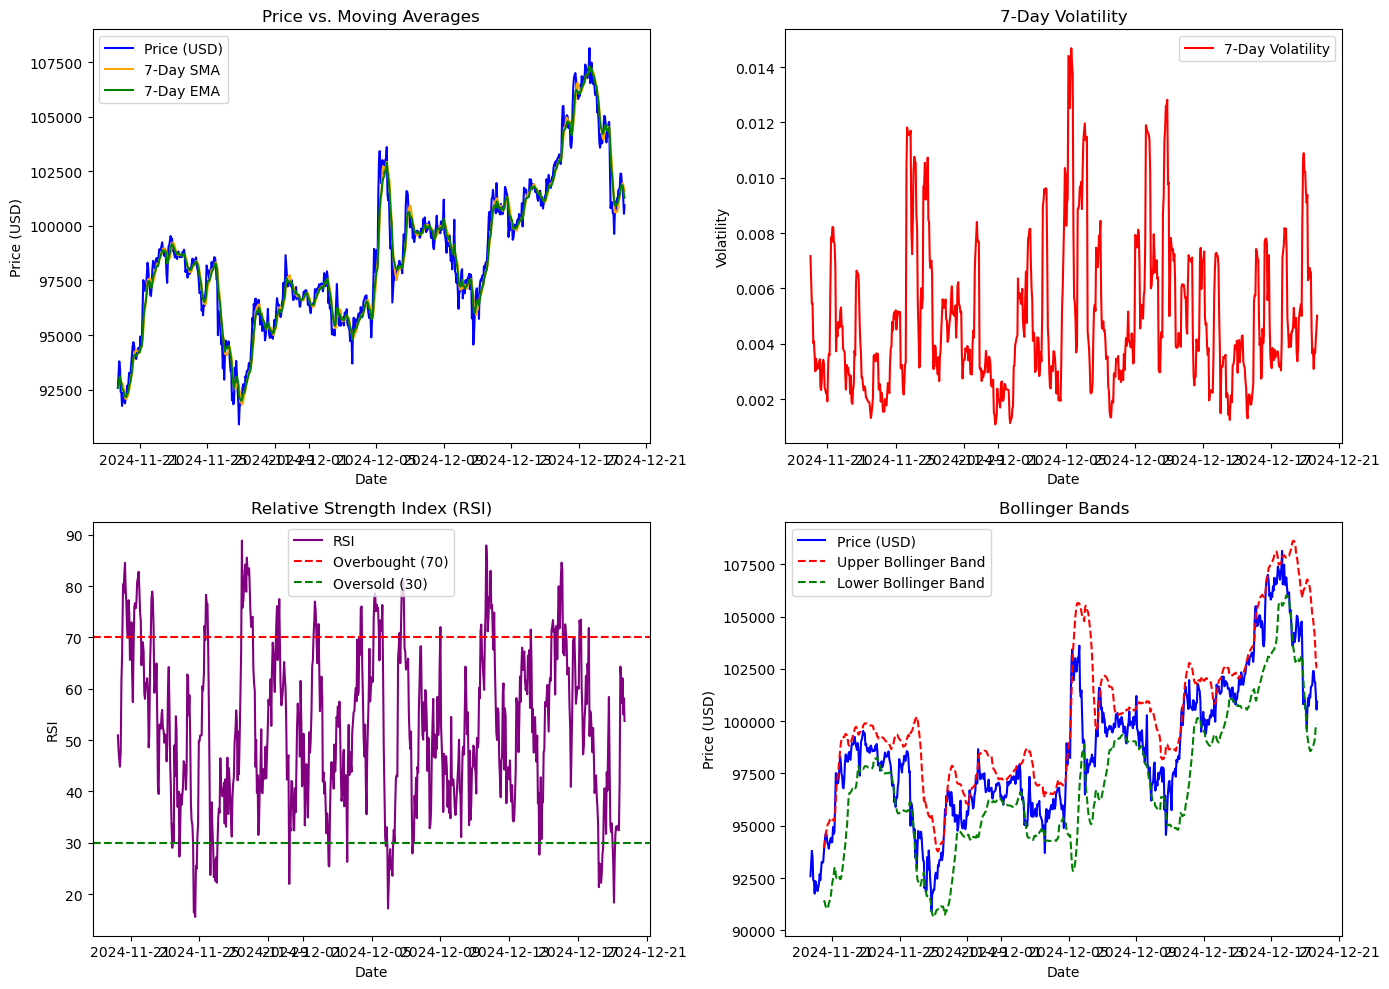

In [185]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from web3 import Web3
from datetime import datetime
import time

# Fetch cryptocurrency data from CoinGecko
def fetch_crypto_data(coin_id, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)
    data = response.json()
    
    # Process the data into a DataFrame
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    return prices

# Analyze data (Moving Averages, Volatility, etc.)
def analyze_data(data):
    data['SMA_7'] = data['price'].rolling(window=7).mean()  # 7-day Simple Moving Average
    data['EMA_7'] = data['price'].ewm(span=7, adjust=False).mean()  # 7-day Exponential Moving Average
    data['RSI'] = calculate_rsi(data['price'], window=14)  # 14-day Relative Strength Index
    data['Volatility'] = data['price'].pct_change().rolling(window=7).std()  # 7-day Volatility
    data['Upper_Band'], data['Lower_Band'] = calculate_bollinger_bands(data['price'], window=20)  # Bollinger Bands
    return data

# Calculate RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Bollinger Bands
def calculate_bollinger_bands(prices, window=20):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

# Connect to Ganache and deploy/load contract
def connect_to_ethereum():
    ganache_url = "http://127.0.0.1:7545"  # Ganache running locally
    web3 = Web3(Web3.HTTPProvider(ganache_url))
    web3.eth.default_account = web3.eth.accounts[0]  # Use the first account from Ganache

    contract_abi = [
        {
            "inputs": [
                {"internalType": "string", "name": "coin", "type": "string"},
                {"internalType": "uint256", "name": "price", "type": "uint256"},
                {"internalType": "uint256", "name": "movingAvg", "type": "uint256"},
                {"internalType": "uint256", "name": "volatility", "type": "uint256"},
                {"internalType": "uint256", "name": "ema7", "type": "uint256"},
                {"internalType": "uint256", "name": "rsi", "type": "uint256"}
            ],
            "name": "storeData",
            "outputs": [],
            "stateMutability": "nonpayable",
            "type": "function"
        },
        {
            "inputs": [{"internalType": "string", "name": "coin", "type": "string"}],
            "name": "getData",
            "outputs": [
                {"internalType": "uint256", "name": "price", "type": "uint256"},
                {"internalType": "uint256", "name": "movingAvg", "type": "uint256"},
                {"internalType": "uint256", "name": "volatility", "type": "uint256"},
                {"internalType": "uint256", "name": "ema7", "type": "uint256"},
                {"internalType": "uint256", "name": "rsi", "type": "uint256"},
                {"internalType": "uint256", "name": "timestamp", "type": "uint256"}
            ],
            "name": "getData",
            "stateMutability": "view",
            "type": "function"
        }
    ]
    
    contract_bytecode = "608060405234801561001057600080fd5b506105ab806100206000396000f3fe608060405234801561001057600080fd5b50600436106100415760003560e01c806314de7a2414610046578063ae55c8881461007b578063c2a9d2d3146100b0575b600080fd5b610060600480360381019061005b91906102d2565b6100cc565b6040516100729695949392919061040b565b60405180910390f35b610095600480360381019061009091906102d2565b61011e565b6040516100a79695949392919061040b565b60405180910390f35b6100ca60048036038101906100c59190610313565b6101c3565b005b6000818051602081018201805184825260208301602085012081835280955050505050506000915090508060000154908060010154908060020154908060030154908060040154908060050154905086565b6000806000806000806000808860405161013891906103f4565b90815260200160405180910390206040518060c001604052908160008201548152602001600182015481526020016002820154815260200160038201548152602001600482015481526020016005820154815250509050806000015181602001518260400151836060015184608001518560a001519650965096509650965096505091939550919395565b6040518060c001604052808681526020018581526020018481526020018381526020018281526020014281525060008760405161020091906103f4565b9081526020016040518091039020600082015181600001556020820151816001015560408201518160020155606082015181600301556080820151816004015560a08201518160050155905050505050505050565b60006102686102638461049d565b61046c565b90508281526020810184848401111561028057600080fd5b61028b8482856104ed565b509392505050565b600082601f8301126102a457600080fd5b81356102b4848260208601610255565b91505092915050565b6000813590506102cc8161055e565b92915050565b6000602082840312156102e457600080fd5b600082013567ffffffffffffffff8111156102fe57600080fd5b61030a84828501610293565b91505092915050565b60008060008060008060c0878903121561032c57600080fd5b600087013567ffffffffffffffff81111561034657600080fd5b61035289828a01610293565b965050602061036389828a016102bd565b955050604061037489828a016102bd565b945050606061038589828a016102bd565b935050608061039689828a016102bd565b92505060a06103a789828a016102bd565b9150509295509295509295565b60006103bf826104cd565b6103c981856104d8565b93506103d98185602086016104fc565b80840191505092915050565b6103ee816104e3565b82525050565b600061040082846103b4565b915081905092915050565b600060c08201905061042060008301896103e5565b61042d60208301886103e5565b61043a60408301876103e5565b61044760608301866103e5565b61045460808301856103e5565b61046160a08301846103e5565b979650505050505050565b6000604051905081810181811067ffffffffffffffff821117156104935761049261052f565b5b8060405250919050565b600067ffffffffffffffff8211156104b8576104b761052f565b5b601f19601f8301169050602081019050919050565b600081519050919050565b600081905092915050565b6000819050919050565b82818337600083830152505050565b60005b8381101561051a5780820151818401526020810190506104ff565b83811115610529576000848401525b50505050565b7f4e487b7100000000000000000000000000000000000000000000000000000000600052604160045260246000fd5b610567816104e3565b811461057257600080fd5b5056fea264697066735822122046ed739d310b99a0fe78236661eb8ef5ee3daa29a3c9b1fe891ef509ab7e7b3564736f6c63430008000033"
    
    # Create the contract object
    CryptoData = web3.eth.contract(abi=contract_abi, bytecode=contract_bytecode)

    # Deploy the contract
    tx_hash = CryptoData.constructor().transact()
    tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    contract_address = tx_receipt.contractAddress

    # Create a contract object using the deployed address
    crypto_data_contract = web3.eth.contract(address=contract_address, abi=contract_abi)
    
    return web3, crypto_data_contract

# Fetch and store data on blockchain
def store_data_on_blockchain(contract, coin, price, moving_avg, volatility, ema7, rsi):
    # Convert all data to uint256 by scaling (e.g., multiply by 10^6)
    scale_factor = 10**6
    scaled_price = int(price * scale_factor)
    scaled_moving_avg = int(moving_avg * scale_factor)
    scaled_volatility = int(volatility * scale_factor)
    scaled_ema7 = int(ema7 * scale_factor)
    scaled_rsi = int(rsi * scale_factor)

    # Print the coin name to ensure consistency
    print(f"Storing data for coin: {coin}")

    # Call the storeData function with all required parameters
    tx_hash = contract.functions.storeData(
        coin, scaled_price, scaled_moving_avg, scaled_volatility, scaled_ema7, scaled_rsi
    ).transact()

    # Wait for the transaction to be mined
    tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    print(f"Transaction mined. Block: {tx_receipt['blockNumber']}")

    # Add a delay before retrieving the data
    time.sleep(5)  # Wait a few seconds to ensure the data is available

    print(f"Data for {coin} has been stored on the blockchain.")

# Visualization for the fetched and analyzed data
def plot_data(data):
    plt.figure(figsize=(14, 10))

    # Plot Price and Moving Averages
    plt.subplot(2, 2, 1)
    plt.plot(data['timestamp'], data['price'], label='Price (USD)', color='blue')
    plt.plot(data['timestamp'], data['SMA_7'], label='7-Day SMA', color='orange')
    plt.plot(data['timestamp'], data['EMA_7'], label='7-Day EMA', color='green')
    plt.title('Price vs. Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plot Volatility
    plt.subplot(2, 2, 2)
    plt.plot(data['timestamp'], data['Volatility'], label='7-Day Volatility', color='red')
    plt.title('7-Day Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()

    # Plot RSI
    plt.subplot(2, 2, 3)
    plt.plot(data['timestamp'], data['RSI'], label='RSI', color='purple')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()

    # Plot Bollinger Bands
    plt.subplot(2, 2, 4)
    plt.plot(data['timestamp'], data['price'], label='Price (USD)', color='blue')
    plt.plot(data['timestamp'], data['Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
    plt.plot(data['timestamp'], data['Lower_Band'], label='Lower Bollinger Band', color='green', linestyle='--')
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Define the cryptocurrency coin and the number of days of data to fetch
    coin_id = 'bitcoin'
    days = 30  # last 30 days of data

    # Fetch cryptocurrency data
    print(f"Fetching data for {coin_id}...")
    crypto_data = fetch_crypto_data(coin_id, days)
    print(f"Fetched {len(crypto_data)} data points for {coin_id}.")

    # Analyze data
    print("Analyzing data...")
    analyzed_data = analyze_data(crypto_data)

    # Connect to Ethereum blockchain and deploy contract
    print("Connecting to Ethereum blockchain...")
    web3, crypto_data_contract = connect_to_ethereum()
    print(f"Connected to Ethereum. Contract address: {crypto_data_contract.address}")

    # Store the last data point on the blockchain
    last_data = analyzed_data.iloc[-1]  # Use the most recent data
    coin = coin_id
    price = last_data['price']
    moving_avg = last_data['SMA_7']
    volatility = last_data['Volatility']
    ema7 = last_data['EMA_7']
    rsi = last_data['RSI']

    print("Storing data on the blockchain...")
    store_data_on_blockchain(crypto_data_contract, coin, price, moving_avg, volatility, ema7, rsi)

    # Optionally, retrieve the stored data from the blockchain
    print("Retrieving data from the blockchain...")
    retrieve_data_from_blockchain(crypto_data_contract, coin)

    # Plot the data
    print("Plotting the data...")
    plot_data(analyzed_data)

if __name__ == "__main__":
    main()
